## Approach
To sample sizes at birth we draw Markov lineages' starting values from $\psi(m) \sim m^{\delta - 1}$ and then we sample in log-space $1000$ series per value of $\gamma$, each of them has a length of $200$.\
We focus on values of $\gamma$ relatively close to the critical point $\gamma \ge 1$, where the initial size distribution shows no mode.

## Sampling starting x points

Let's see how we sample the starting points for each Markov process.\
Having $\psi(m) \sim m^{\delta - 1}$, assume $\delta \approx 0.9$ and, after setting the cut-off at $m = 10$ and normalizing, sample $m$ inverting the cumulative of $\psi$. 
\
Take the log to obtain intial $x$ values.


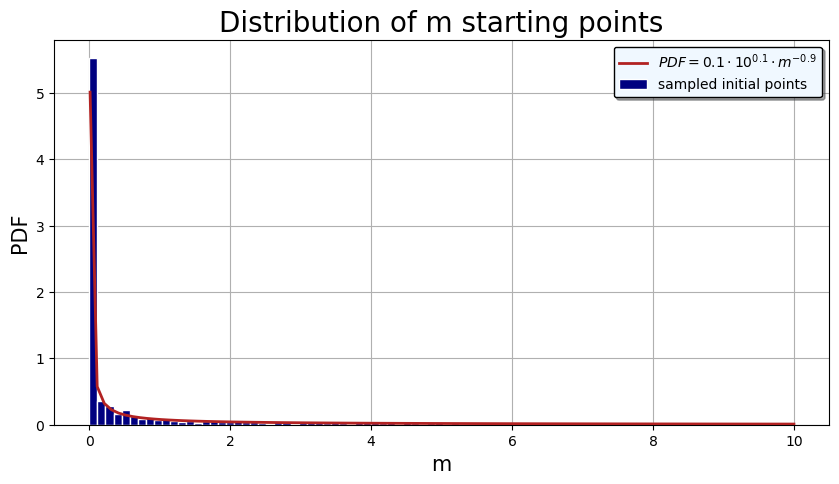

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
xAxis = np.linspace(0.01, 10, 100)
ax.plot(xAxis, psi(xAxis, 10), color = 'firebrick', zorder = 3, linewidth = 2, label = '$PDF = 0.1 \cdot 10^{0.1} \cdot m^{-0.9}$')
ax.hist(startingPoints, bins = 'fd', density = True, color = 'navy', edgecolor = 'white', zorder = 2, label = 'sampled initial points')
ax.grid(zorder = 1)
ax.set_title("Distribution of m starting points", fontsize = 20)
ax.set_xlabel("m", fontsize = 15)
ax.set_ylabel("PDF", fontsize = 15)
ax.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True)
plt.show()

Below we show increasing moments of om $m$ approaching the critical point. The red line is only put there as a reference. I think we might be suffering from finite size effects.

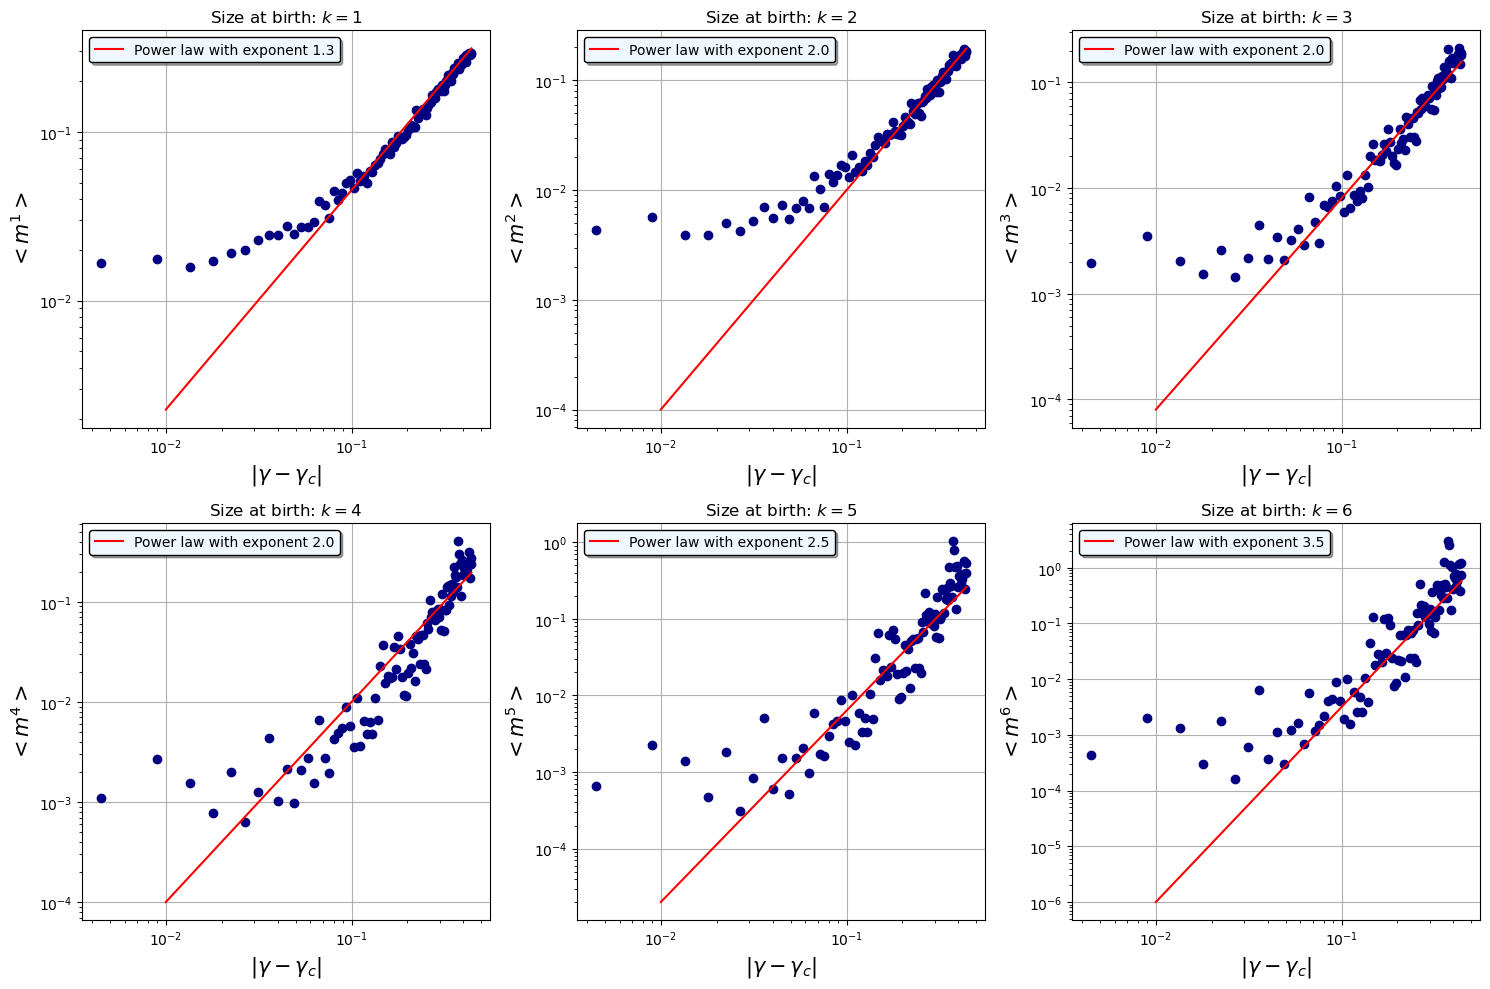

In [23]:
fig, ax_ = plt.subplots(2, 3, figsize = (15, 10))
powerLawValues = {'1':(0.9, 1.3), '2': (1, 2), '3': (0.8, 2) , '4':(1, 2), '5':(2, 2.5), '6':(10 ,3.5)}
xAxis = np.linspace(0.01, np.max(np.abs(gammaValues - criticalPoint)), 100)
for k, ax in zip(range(1, 7), ax_.flatten()):
    ax.set_title(f'Size at birth: $k = {k}$')
    ax.set_xlabel('$|\gamma - \gamma_c|$', fontsize = 15)
    ax.set_ylabel(f'$<m^{k}>$', fontsize = 15)
    yArr = np.exp(allSizes)**k
    y = np.mean(yArr, axis = 1)
    y3 = powerLaw(xAxis,*powerLawValues[str(int(k))])
    ax.scatter(np.abs(gammaValues  - criticalPoint), y, color = 'navy', zorder = 2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(zorder = 1)
    ax.plot(xAxis, y3, color = 'red', zorder = 3, label = f'Power law with exponent {powerLawValues[str(int(k))][1]:.1f}')
    ax.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True)
fig.tight_layout()

In the following cell the distribution of initial sizes $m$ and of log initial sizes $x$ is shown to verify that the behaviour is the corret one.

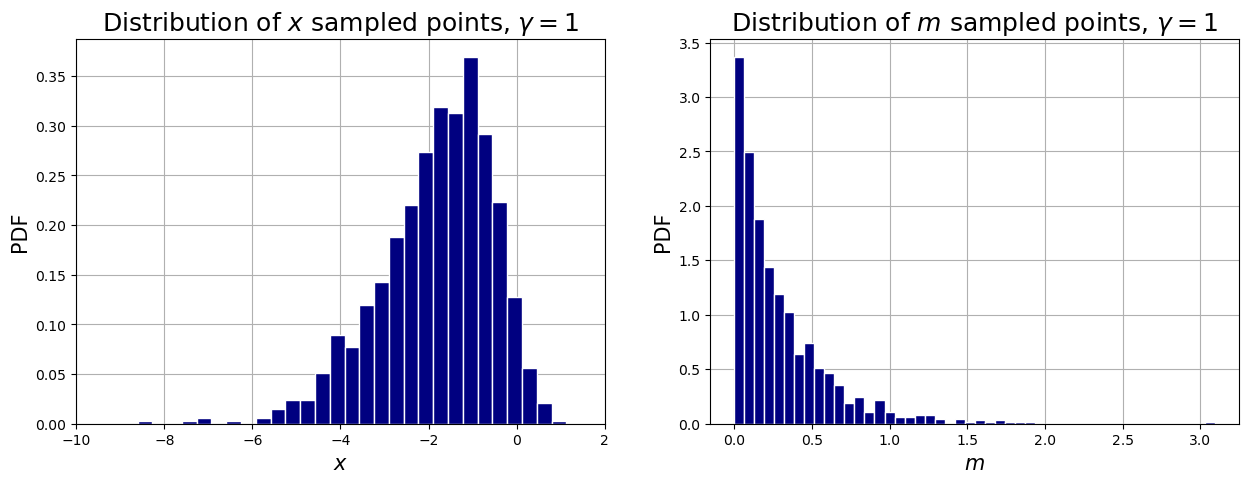

In [50]:
fig, ax_ = plt.subplots(1, 2, figsize = (15, 5))
ax, ax1 = ax_.flatten()
ax.hist(allSizes[0,:], bins = 'fd', density = True, color = 'navy', edgecolor = 'white', zorder = 2)
ax1.hist(np.exp(allSizes[0,:]), bins = 'fd', density = True, color = 'navy', edgecolor = 'white', zorder = 2)
ax.set_xlim(-10, 2)
ax.grid(zorder = 1)
ax1.grid(zorder = 1)
ax.set_title(f"Distribution of $x$ sampled points, $\gamma = {gammaValues[0]:.0f}$", fontsize = 18)
ax1.set_title(f"Distribution of $m$ sampled points, $\gamma = {gammaValues[0]:.0f}$", fontsize = 18)
ax.set_xlabel("$x$", fontsize = 15)
ax1.set_xlabel("$m$", fontsize = 15)
ax.set_ylabel("PDF", fontsize = 15)
ax1.set_ylabel("PDF", fontsize = 15)
plt.show()

In the last meeting we we talked about plotting the log of the sizes at birth $x$ instead of $m$. However I was not quite sure about how $<x>$ should behave knowing how $<m>$ should scale.\
If $<m>$ scales as $|\gamma - \gamma_c|$ Taylor expanding we should have something like $<x> \sim log(|\gamma - \gamma_c|) - \dfrac{1}{|\gamma -\gamma_c|} + 1$ but there might be constants floating around. So this is what I plotted below but here I stopped.

/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_9360/2315003498.py:2: RuntimeWarning: divide by zero encountered in log
  ax.scatter(np.log(np.abs(gammaValues - criticalPoint)) - 1/np.abs(gammaValues - criticalPoint) + 1, np.mean(allSizes, axis = 1), color = 'navy')
/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_9360/2315003498.py:2: RuntimeWarning: divide by zero encountered in divide
  ax.scatter(np.log(np.abs(gammaValues - criticalPoint)) - 1/np.abs(gammaValues - criticalPoint) + 1, np.mean(allSizes, axis = 1), color = 'navy')


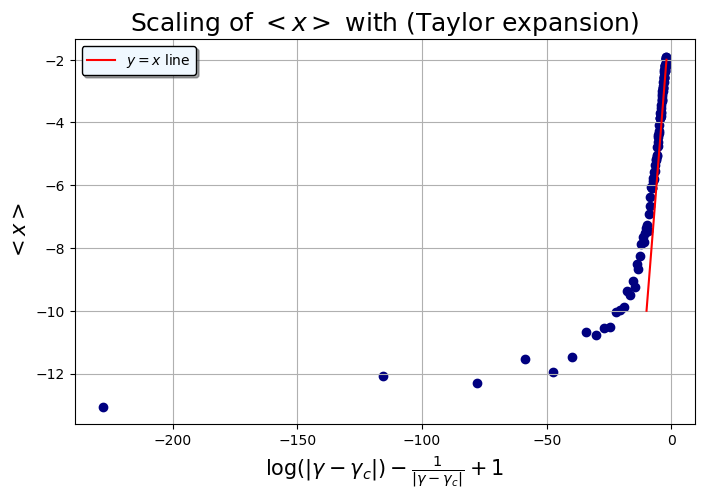

In [56]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
ax.scatter(np.log(np.abs(gammaValues - criticalPoint)) - 1/np.abs(gammaValues - criticalPoint) + 1, np.mean(allSizes, axis = 1), color = 'navy')
ax.grid()
ax.plot(np.linspace(-10, -2, 100),  1*np.linspace(-10, -2, 100) , color = 'red', label = '$y = x$ line')
ax.set_xlabel("$\log(|\gamma - \gamma_c|) - \\frac{1}{|\gamma - \gamma_c|} + 1$", fontsize = 15)
ax.set_ylabel("$<x>$", fontsize = 15)
ax.set_title("Scaling of $<x>$ with (Taylor expansion)", fontsize = 18)
ax.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True)

## Correlation length $\xi$
As far as the correlation length I started computing it by evaluating the mean of the autocorrelation function for the $1000$ Markov lineages simulated at each $\gamma$.\
I realized though that to obtain a reliable value of $\xi$ I needed much longer simulations (much longer that $200$). So the resuts below show the correlation $\xi$ computed for one realization of longer lineages ($20000$ steps) like in the previous approach but this time drawing the starting point of the lineage from $\psi \sim m^{\delta - 1}$.\
So the sizes at birth and the correlation length are effectively from different lineages but doing $1000$ realization of very long lineages took too much time, we might have to come up with a solution.
\
\
Anyway, even though we have high variance the $\xi \sim m^{-1}$ behaviour seems approximately to be there.

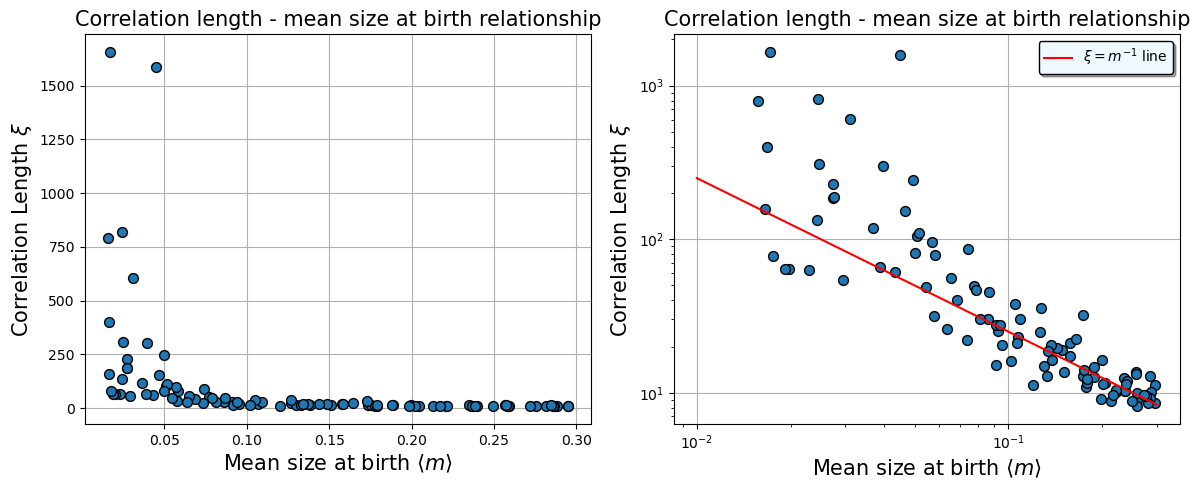

In [66]:
fig, ax_ = plt.subplots(1, 2, figsize = (12, 5))

meanSizesAtBirth = np.mean(np.exp(allSizes), axis = 1)
for ax, axis in zip(ax_.flatten(), ['linear', 'log']):
    ax.scatter(meanSizesAtBirth, corrLengths, edgecolor = 'black', s = 50, zorder = 2)
    #ax.set_ylim(bottom = bottom, top = top)
    ax.grid(zorder = 1)
    ax.set_xlabel('Mean size at birth $\\langle m \\rangle$', fontsize = 15)
    ax.set_ylabel('Correlation Length $\\xi$', fontsize = 15)
    ax.set_title('Correlation length - mean size at birth relationship', fontsize = 15)
    ax.set_xscale(axis)
    ax.set_yscale(axis)
    
ax_[1].plot(np.linspace(0.01, 0.3, 1000), powerLaw(np.linspace(0.01, 0.3, 1000), 2.5, -1), color = 'red', label = '$\\xi = m^{-1}$ line')
ax_[1].legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True)
fig.tight_layout()
plt.show()

Also the behaviourof $2 - \eta$ has high variance but seems approximately to approach $1/2$ as the critical point is approached.

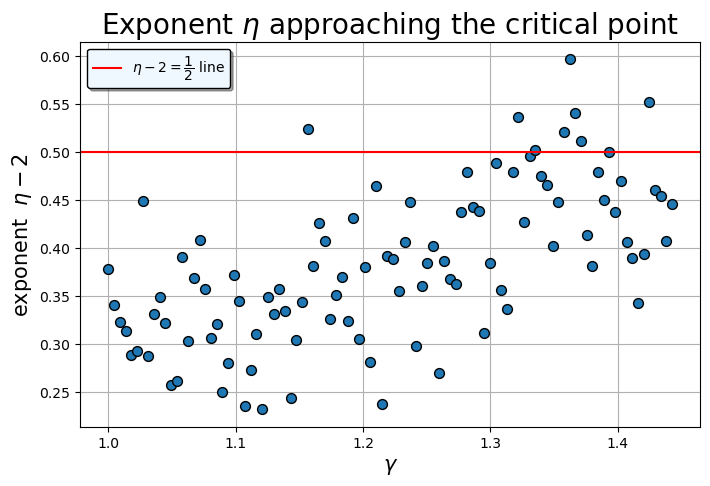

In [69]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
ax.scatter(gammaValues, exponentN, edgecolor = 'black', s = 50, zorder = 2)
#ax.set_ylim(bottom = bottom,top = top)
ax.grid(zorder = 1)
ax.set_xlabel('$\\gamma$', fontsize = 15)
ax.set_ylabel('exponent  $\\eta - 2$', fontsize = 15)
ax.set_title('Exponent $\\eta$ approaching the critical point', fontsize = 20)
ax.axhline(y = 1/2, color = 'red', label = '$\\eta - 2 = \\dfrac{1}{2}$ line')
ax.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True)
